# Sistema de control de frenado de bicicleta

Este sistema tiene como objetivo el control del freno de una bicicleta, este se presionará con una intensidad que va desde el 0 % al 100% dependiendo de la distancia de la bicicleta al un semáforo y su velocidad actual. 


In [2]:
%matplotlib notebook
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## Velocidad

La velocidad se clasificará de la siguiente manera:
 - <b>Detenida: </b> menos de 5 km/h
 - <b>Lenta: </b> 0 a 20 km/h
 - <b>Rápida: </b> 10 a 50 km/h
 - <b>Muy rápida: </b> 30 a 50 km/h

<IPython.core.display.Javascript object>


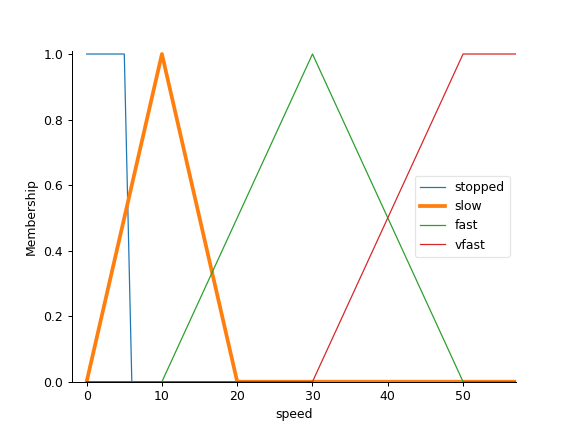

In [4]:
speed = ctrl.Antecedent(np.arange(0, 60, 1), 'speed')
speed['stopped'] = fuzz.trapmf(speed.universe, [0, 0, 5, 5])
speed['slow'] = fuzz.trimf(speed.universe, [0, 10, 20])
speed['fast'] = fuzz.trimf(speed.universe, [10, 30, 50])
speed['vfast'] = fuzz.trapmf(speed.universe, [30, 50, 60, 60])
speed['slow'].view()

## Distancia

La distancia al semáforo se clasificará de la siguiente manera:
 - <b>Encima: </b> menos de 5 m
 - <b>Cerca: </b> 5 m a 25 m
 - <b>Lejos: </b> 20 m a 40 m
 - <b>Muy Lejos: </b> 35 m a 50 m

<IPython.core.display.Javascript object>


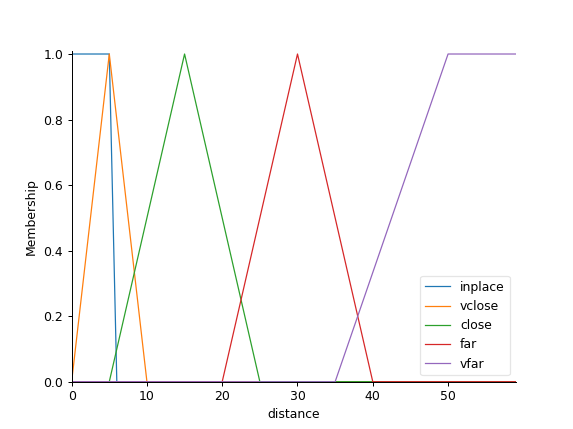

In [5]:
distance = ctrl.Antecedent(np.arange(0, 60, 1), 'distance')
distance['inplace'] = fuzz.trapmf(distance.universe, [0, 0, 5, 5])
distance['vclose'] = fuzz.trimf(distance.universe, [0, 5, 10])
distance['close'] = fuzz.trimf(distance.universe, [5, 15, 25])
distance['far'] = fuzz.trimf(distance.universe, [20, 30, 40])
distance['vfar'] = fuzz.trapmf(distance.universe, [35, 50, 60, 60])
distance.view()

## Presión

La presión ejercida sobre el freno se clasificará de la siguiente manera:
 - <b>Nada: </b> 0%
 - <b>Ligera: </b> 0% a 30%
 - <b>Media: </b> 20% a 80%
 - <b>Fuerte: </b> 50% a  80%

<IPython.core.display.Javascript object>


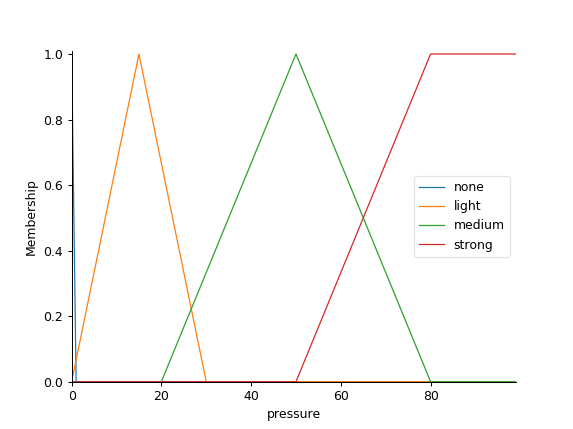

In [6]:
pressure = ctrl.Consequent(np.arange(0, 100, 1), 'pressure')
pressure['none'] = fuzz.trimf(pressure.universe, [0, 0, 0])
pressure['light'] = fuzz.trimf(pressure.universe, [0, 15, 30])
pressure['medium'] = fuzz.trimf(pressure.universe, [20, 50, 80])
pressure['strong'] = fuzz.trapmf(pressure.universe, [50, 80, 100, 100])
pressure.view()

In [14]:
method = "lom"
#centroid
#bisector
#mom
#som
#lom
pressure.defuzzify_method = method

## Reglas

Las siguientes reglas definiran que tipo de presión es la recomendada para cada situación.

<table style="float:left; font-size:15px">
    <tr>
        <th></th>
        <th>Detenida</th>
        <th>Lenta</th>
        <th>Rápida</th>
        <th>Muy Rápida</th>
    </tr>
    <tr>
        <th>Encima</th>
        <td>Nada</td>
        <td>Media</td>
        <td>Fuerte</td>
        <td>Fuerte</td>
    </tr>
    <tr>
        <th>Muy Cerca</th>
        <td>Nada</td>
        <td>Ligera</td>
        <td>Fuerte</td>
        <td>Fuerte</td>
    </tr>
    <tr>
        <th>Cerca</th>
        <td>Nada</td>
        <td>Ligera</td>
        <td>Fuerte</td>
        <td>Fuerte</td>
    </tr>
    <tr>
        <th>Lejos</th>
        <td>Nada</td>
        <td>Nada</td>
        <td>Media</td>
        <td>Media</td>
    </tr>
    <tr>
        <th>Muy Lejos</th>
        <td>Nada</td>
        <td>Nada</td>
        <td>Ligera</td>
        <td>Ligera</td>
    </tr>
</table>

In [15]:
rules = []
rules.append(ctrl.Rule( speed['stopped']                          ,pressure['none']))
rules.append(ctrl.Rule( speed['slow']       & distance['far']     ,pressure['none']))
rules.append(ctrl.Rule( speed['slow']       & distance['vfar']    ,pressure['none']))
rules.append(ctrl.Rule( speed['slow']       & distance['close']   ,pressure['light']))
rules.append(ctrl.Rule( speed['slow']       & distance['vclose']  ,pressure['light']))
rules.append(ctrl.Rule( distance['vfar']    & speed['fast']       ,pressure['light']))
rules.append(ctrl.Rule( distance['vfar']    & speed['vfast']      ,pressure['light']))
rules.append(ctrl.Rule( speed['slow']       & distance['inplace'] ,pressure['medium']))
rules.append(ctrl.Rule( distance['far']     & speed['fast']       ,pressure['medium']))
rules.append(ctrl.Rule( distance['far']     & speed['vfast']      ,pressure['medium']))
rules.append(ctrl.Rule( distance['inplace'] & speed['fast']       ,pressure['strong']))
rules.append(ctrl.Rule( distance['inplace'] & speed['vfast']      ,pressure['strong']))
rules.append(ctrl.Rule( distance['vclose']  & speed['fast']       ,pressure['strong']))
rules.append(ctrl.Rule( distance['vclose']  & speed['vfast']      ,pressure['strong']))
rules.append(ctrl.Rule( distance['close']   & speed['fast']       ,pressure['strong']))
rules.append(ctrl.Rule( distance['close']   & speed['vfast']      ,pressure['strong']))

In [16]:
breaking_ctrl = ctrl.ControlSystem(rules)
breaking = ctrl.ControlSystemSimulation(breaking_ctrl)

In [17]:
breaking.input['speed'] = 20
breaking.input['distance'] = 23

In [18]:
breaking.compute()

In [19]:
breaking.print_state()

 Antecedents 
Antecedent: speed                   = 20
  - stopped                         : 0.0
  - slow                            : 0.0
  - fast                            : 0.5
  - vfast                           : 0.0
Antecedent: distance                = 23
  - inplace                         : 0.0
  - vclose                          : 0.0
  - close                           : 0.2
  - far                             : 0.3
  - vfar                            : 0.0

 Rules 
RULE #0:
  IF speed[stopped] THEN pressure[none]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - speed[stopped]                                         : 0.0
                                            speed[stopped] = 0.0
  Activation (THEN-clause):
                                            pressure[none] : 0.0

RULE #1:
  IF speed[slow] AND distance[far] THEN pressure[none]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-c

In [20]:
print("Resultado: "+str(breaking.output['pressure']))

Resultado: 71.0


<IPython.core.display.Javascript object>


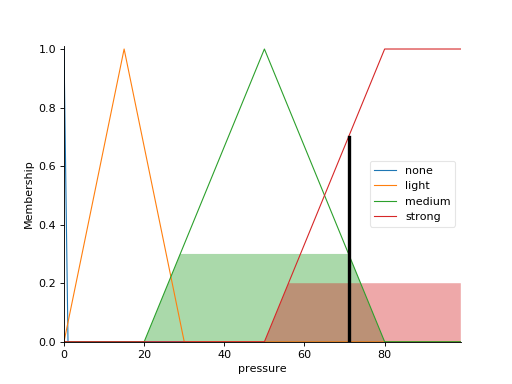

In [21]:
pressure.view(sim=breaking)
#plt.savefig('/tmp/'+method+'png')